# My own data gathering, knowledge inference and visualisation

This is the final code used in my project.

## Load packages and get the code from github


In [1]:
import sys
!{sys.executable} -m pip install gitpython
!{sys.executable} -m pip install pyvis

import os
import re

import pathlib
from pathlib import Path

import networkx as nx
import matplotlib.pyplot as plt
import graphviz as viz

from git import Repo
import ast

     |████████████████████████████████| 174kB 8.5MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 


In [2]:
cwd = os.getcwd()
CODE_ROOT_FOLDER= cwd + "/Zeegu-API/"
if not os.path.exists(CODE_ROOT_FOLDER):
  Repo.clone_from("https://github.com/zeeguu-ecosystem/Zeeguu-API", CODE_ROOT_FOLDER)
repo = Repo(CODE_ROOT_FOLDER)

## Directories and python files in these


Find the first and second subdirectories of the root folder of the system

In [3]:
subdirectories = [x[0] for x in os.walk(CODE_ROOT_FOLDER)]
#print(subdirectories)
firstlevel = []
secondlevel = []
for dic in subdirectories:
  parts = dic.split("/")
  if parts[3] not in firstlevel:
    if len(parts[3]) > 0:
      firstlevel.append(parts[3])
  try:
    if (parts[3], parts[4]) not in secondlevel:
      secondlevel.append((parts[3], parts[4]))
  except:
    continue

print("First level directories")
for elem in firstlevel:
  print(elem)
print()

print("Second level directories")
for elem in secondlevel:
  print(f'{elem[0]} -> {elem[1]}')

First level directories
.git
tests
.githooks
zeeguu_api
.github
zeeguu_core
tools

Second level directories
.git -> branches
.git -> objects
.git -> info
.git -> logs
.git -> refs
.git -> hooks
tests -> zeeguu_core_test
tests -> zeeguu_api_test
.githooks -> rules
zeeguu_api -> api
.github -> workflows
zeeguu_core -> sql
zeeguu_core -> language
zeeguu_core -> model
zeeguu_core -> user_activity_hooks
zeeguu_core -> configuration
zeeguu_core -> elastic
zeeguu_core -> emailer
zeeguu_core -> content_recommender
zeeguu_core -> util
zeeguu_core -> definition_of_learned
zeeguu_core -> word_stats
zeeguu_core -> word_scheduling
zeeguu_core -> user_statistics
zeeguu_core -> account_management
zeeguu_core -> exercises
zeeguu_core -> content_retriever
zeeguu_core -> bookmark_quality
zeeguu_core -> crowd_translations
tools -> sql
tools -> vis
tools -> sh
tools -> migrations


Python files in first, second and third level

In [4]:
import glob

pyfiles_firstlevel = []
pyfiles_secondlevel = []
pyfiles_thirdlevel = []

for file in Path(CODE_ROOT_FOLDER).glob("*.py"):
    pyfiles_firstlevel.append(("root", str(file).split("/")[3]))

print("First level python files")
for elem in pyfiles_firstlevel:
  print(f'{elem[0]} -> {elem[1]}')
print()

for elem in firstlevel:
  for file in Path(CODE_ROOT_FOLDER+elem+"/").glob("*.py"):
      pyfiles_secondlevel.append((elem, str(file).split("/")[4]))

print("Second level python files")
for elem in pyfiles_secondlevel:
  print(f'{elem[0]} -> {elem[1]}')
print()

for elem in secondlevel:
  for file in Path(CODE_ROOT_FOLDER+elem[0]+"/"+elem[1]+"/").glob("*.py"):
      pyfiles_thirdlevel.append((elem[0]+"/"+elem[1], str(file).split("/")[5]))

print("Third level python files")
for elem in pyfiles_thirdlevel:
  print(f'{elem[0]} -> {elem[1]}')
print()


First level python files
root -> env_var_defs_default.py
root -> setup.py

Second level python files
zeeguu_api -> app.py
zeeguu_api -> cross_domain_app.py
zeeguu_api -> __main__.py
zeeguu_api -> __init__.py
zeeguu_api -> custom_fmd_graphs.py
zeeguu_core -> constants.py
zeeguu_core -> __init__.py
tools -> recompute_fk_difficulties_for_polish.py
tools -> past_exercises_for_user.py
tools -> exercise_analysis.py
tools -> tag_existing_articles.py
tools -> recompute_recommender_cache.py
tools -> update_particular_tag.py
tools -> update_feed.py
tools -> article_crawler.py
tools -> remove_unreferenced_articles.py
tools -> cleanup_non_content_bits.py
tools -> flatten_unicode_characters.py
tools -> forget_user.py
tools -> anonimize_users.py
tools -> saturate_word_interaction_history.py
tools -> delete_bookmark.py
tools -> tag_topics_in_danish.py
tools -> consolidate_accounts.py
tools -> add_all_cohorts_to_teacher.py
tools -> fill_historical_exercise_sessions.py
tools -> add_rssfeed.py
tools -> 

## Dependencies

Get dependencies of each file

In [5]:
def get_imports(path):
    implist = []
    with open(path) as fh:
      try:        
        root = ast.parse(fh.read())
      except:
        print(f'There was a parse error in file: {file}')
        return []

    for node in ast.iter_child_nodes(root):
        if isinstance(node, ast.Import):
            module = []
        elif isinstance(node, ast.ImportFrom):  
            module = node.module
        else:
          imps = get_imp_rec(node)
          if len(imps)>0:
            for k in imps:
              implist.append(k)
          continue

        for n in node.names:
          if module not in implist and module!=None and len(module) > 0:
            implist.append(module)
          if n.name not in implist and len(n.name) > 0 and module!=None and len(module)==0:
            implist.append(n.name)
    return implist

def get_imp_rec(root):
    implist = []
    for node in ast.iter_child_nodes(root):
        if isinstance(node, ast.Import):
            module = []
        elif isinstance(node, ast.ImportFrom):  
            module = node.module
        else:
            continue

        for n in node.names:
          if module not in implist and module!=None and len(module) > 0:
            implist.append(module)
          if n.name not in implist and len(n.name) > 0 and module!=None and len(module)==0:
            implist.append(n.name)
    return implist

def imports(file):
    #print(file)
    implist = []
    try:
      ast_tree = ast.parse(f.read())
      for elem in ast_tree.body:
        if isinstance(elem, ast.Import):
          for k in elem.names:
            implist.append(k.alias.name)
        if isinstance(elem, ast.Import):
          implist.append(elem.module)
      return implist
    except:
      print(f'There was a parse error in file: {file}')
      return []
    finally:
      f.close()
    return []

In [6]:
dep_firstlevel = []
dep_secondlevel = []
dep_thirdlevel = []

In [7]:
for file in pyfiles_firstlevel:
  dep_firstlevel.append((file[1], get_imports(CODE_ROOT_FOLDER+file[1])))


print("Dependencies in python files - Root")
for elem in dep_firstlevel:
  print(f'{elem[0]} -> {elem[1]}')
print()

for file in pyfiles_secondlevel:
  dep_secondlevel.append((file[0]+"/"+file[1], get_imports(CODE_ROOT_FOLDER+file[0]+"/"+file[1])))

print("Dependencies in python files - Directories")
for elem in dep_secondlevel:
  print(f'{elem[0]} -> {elem[1]}')
print()

for file in pyfiles_thirdlevel:
  dep_thirdlevel.append((file[0]+"/"+file[1], get_imports(CODE_ROOT_FOLDER+file[0]+"/"+file[1])))

print("Dependencies in python files - Sub directories")
for elem in dep_thirdlevel:
  print(f'{elem[0]} -> {elem[1]}')
print()


Dependencies in python files - Root
env_var_defs_default.py -> ['os']
setup.py -> ['setuptools', 'setuptools.command.develop', 'setuptools.command.install', 'nltk', 'os']

Dependencies in python files - Directories
zeeguu_api/app.py -> ['zeeguu_core.configuration.configuration', 'flask_cors', 'flask', 'logging', 'apimux.log', 'zeeguu_core', 'zeeguu_core.model', 'api', 'flask_monitoringdashboard', 'custom_fmd_graphs', 'zeeguu_core.model', 'zeeguu_api.machine_specific']
zeeguu_api/cross_domain_app.py -> ['flask']
zeeguu_api/__main__.py -> ['zeeguu_api']
zeeguu_api/__init__.py -> []
zeeguu_api/custom_fmd_graphs.py -> []
zeeguu_core/constants.py -> []
zeeguu_core/__init__.py -> ['logging', 'os', 'sys', 'sentry_sdk', 'sentry_sdk.integrations.flask', 'zeeguu_core.word_stats']
tools/recompute_fk_difficulties_for_polish.py -> ['zeeguu_core', 'zeeguu_core.model', 'zeeguu_core.language.difficulty_estimator_factory']
tools/past_exercises_for_user.py -> ['datetime', 'zeeguu_core.model', 'zeeguu_co

## Connect dependencies with second level directories - Knowledge Inference

In [14]:
modules = []
for elem in secondlevel:
  modules.append(elem[0]+"."+elem[1])
print(modules)

['.git.branches', '.git.objects', '.git.info', '.git.logs', '.git.refs', '.git.hooks', 'tests.zeeguu_core_test', 'tests.zeeguu_api_test', '.githooks.rules', 'zeeguu_api.api', '.github.workflows', 'zeeguu_core.sql', 'zeeguu_core.language', 'zeeguu_core.model', 'zeeguu_core.user_activity_hooks', 'zeeguu_core.configuration', 'zeeguu_core.elastic', 'zeeguu_core.emailer', 'zeeguu_core.content_recommender', 'zeeguu_core.util', 'zeeguu_core.definition_of_learned', 'zeeguu_core.word_stats', 'zeeguu_core.word_scheduling', 'zeeguu_core.user_statistics', 'zeeguu_core.account_management', 'zeeguu_core.exercises', 'zeeguu_core.content_retriever', 'zeeguu_core.bookmark_quality', 'zeeguu_core.crowd_translations', 'tools.sql', 'tools.vis', 'tools.sh', 'tools.migrations']


In [25]:
# Parts : firstlevel
# Sub directories : modules
# Dependencies dep_firstlevel, dep_secondlevel, dep_thirdlevel. elem[0] = .py elem[1] = list of dependencies
relationsFirst = []
for dep in dep_firstlevel:
  deps = []
  for elem in firstlevel:
    for k in dep[1]:
      if elem in k and elem not in deps:
        deps.append(elem)
  #print(deps)
  relationsFirst.append( (dep[0], deps) )
print(relationsFirst)

relationsSecond = []
for dep in dep_secondlevel:
  deps = []
  for elem in firstlevel:
    for k in dep[1]:
      if elem in k and elem not in deps:
        deps.append(elem)
  #print(deps)
  relationsSecond.append( (dep[0], deps) )
print(relationsSecond)

relationsThird = []
for dep in dep_thirdlevel:
  deps = []
  for elem in modules:
    for k in dep[1]:
      if elem in k and elem not in deps:
        deps.append(elem)
  #print(deps)
  relationsThird.append( (dep[0], deps) )
print(relationsThird)

[('env_var_defs_default.py', []), ('setup.py', ['tools'])]
[('zeeguu_api/app.py', ['zeeguu_api', 'zeeguu_core']), ('zeeguu_api/cross_domain_app.py', []), ('zeeguu_api/__main__.py', ['zeeguu_api']), ('zeeguu_api/__init__.py', []), ('zeeguu_api/custom_fmd_graphs.py', []), ('zeeguu_core/constants.py', []), ('zeeguu_core/__init__.py', ['zeeguu_core']), ('tools/recompute_fk_difficulties_for_polish.py', ['zeeguu_core']), ('tools/past_exercises_for_user.py', ['zeeguu_core']), ('tools/exercise_analysis.py', ['zeeguu_core']), ('tools/tag_existing_articles.py', ['zeeguu_core']), ('tools/recompute_recommender_cache.py', ['zeeguu_core']), ('tools/update_particular_tag.py', ['zeeguu_core']), ('tools/update_feed.py', ['zeeguu_core']), ('tools/article_crawler.py', ['zeeguu_core']), ('tools/remove_unreferenced_articles.py', ['zeeguu_core']), ('tools/cleanup_non_content_bits.py', ['zeeguu_core']), ('tools/flatten_unicode_characters.py', ['zeeguu_core']), ('tools/forget_user.py', ['zeeguu_core']), ('too

In [37]:
# Condense the result

# for relationsSecond 1) split on / and take the first substring and build dependencies for that module
condensedSecond = []

for elem in relationsSecond:
  mod1 = elem[0].split("/")[0]
  condensedSecond.append((mod1, elem[1]))

dictSecond = {}
for elem in condensedSecond:
  if elem[0] not in dictSecond:
    dictSecond[elem[0]] = elem[1]
  else:
    values = dictSecond[elem[0]]
    for k in elem[1]:
      if k not in values:
        values.append(k)
    dictSecond[elem[0]] = values

print(dictSecond)


condensedThird = []

for elem in relationsThird:
  mod1 = elem[0].split("/")
  mod2 = mod1[0]+"."+mod1[1]
  condensedThird.append((mod2, elem[1]))

dictThird = {}
for elem in condensedThird:
  if elem[0] not in dictThird:
    dictThird[elem[0]] = elem[1]
  else:
    values = dictThird[elem[0]]
    for k in elem[1]:
      if k not in values:
        values.append(k)
    dictThird[elem[0]] = values

print(dictThird)

{'zeeguu_api': ['zeeguu_api', 'zeeguu_core'], 'zeeguu_core': ['zeeguu_core'], 'tools': ['zeeguu_core']}
{'tests.zeeguu_core_test': ['zeeguu_core.model', 'zeeguu_core.language', 'zeeguu_core.word_scheduling', 'zeeguu_core.content_retriever', 'zeeguu_core.definition_of_learned', 'zeeguu_core.bookmark_quality'], 'tests.zeeguu_api_test': ['zeeguu_api.api', 'zeeguu_core.model', 'zeeguu_core.content_retriever'], 'zeeguu_api.api': ['zeeguu_core.model', 'zeeguu_api.api', 'zeeguu_core.bookmark_quality', 'zeeguu_core.content_recommender', 'zeeguu_core.word_scheduling', 'zeeguu_core.exercises', 'zeeguu_core.emailer', 'zeeguu_core.account_management', 'zeeguu_core.user_activity_hooks', 'zeeguu_core.crowd_translations', 'zeeguu_core.user_statistics'], 'zeeguu_core.sql': [], 'zeeguu_core.language': ['zeeguu_core.language'], 'zeeguu_core.model': ['zeeguu_core.model', 'zeeguu_core.util', 'zeeguu_core.language', 'zeeguu_core.configuration', 'zeeguu_core.definition_of_learned', 'zeeguu_core.bookmark_qua

## Visualisation

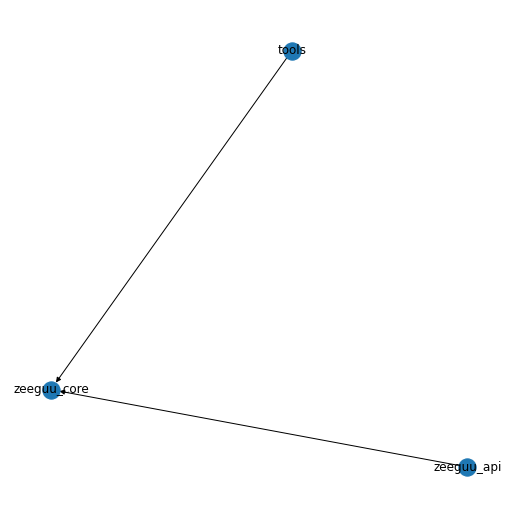

In [54]:
def dependencies_graph(dictRelations):
    G = nx.DiGraph()

    for key in dictRelations.keys():
      #print(file)
      if key not in G.nodes:
          G.add_node(key)
      for each in dictRelations[key]:
          G.add_edge(key, each)

    return G

def draw_graph_with_labels(G, figsize=(10,10)):
    plt.figure(figsize=figsize)
    nx.draw(G, with_labels=True)
    plt.show()

G = dependencies_graph(dictSecond)
draw_graph_with_labels(G, figsize=(7,7))

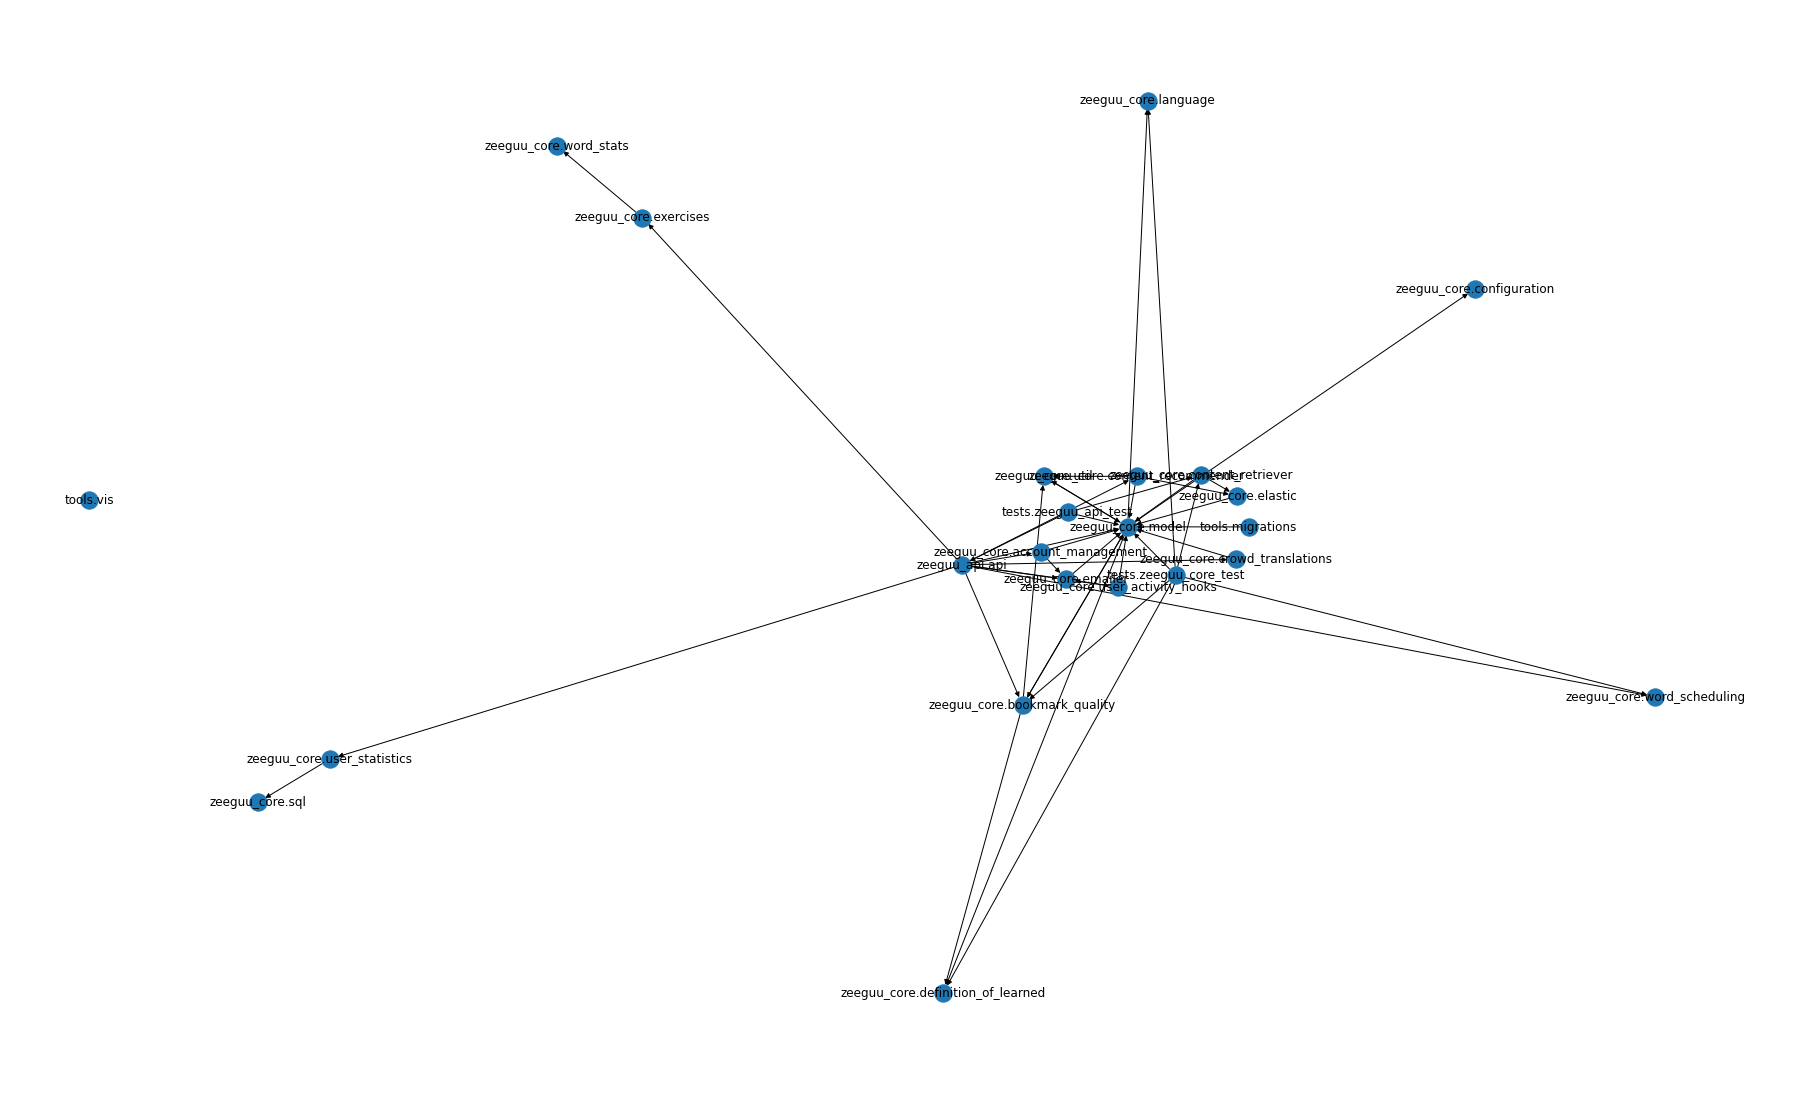

In [51]:
G = dependencies_graph(dictThird)
draw_graph_with_labels(G, figsize=(25,15))

{'tests.zeeguu_core_test': ['zeeguu_core.model', 'zeeguu_core.language', 'zeeguu_core.word_scheduling', 'zeeguu_core.content_retriever', 'zeeguu_core.definition_of_learned', 'zeeguu_core.bookmark_quality'], 'tests.zeeguu_api_test': ['zeeguu_api.api', 'zeeguu_core.model', 'zeeguu_core.content_retriever'], 'zeeguu_api.api': ['zeeguu_core.model', 'zeeguu_api.api', 'zeeguu_core.bookmark_quality', 'zeeguu_core.content_recommender', 'zeeguu_core.word_scheduling', 'zeeguu_core.exercises', 'zeeguu_core.emailer', 'zeeguu_core.account_management', 'zeeguu_core.user_activity_hooks', 'zeeguu_core.crowd_translations', 'zeeguu_core.user_statistics'], 'zeeguu_core.sql': [], 'zeeguu_core.language': ['zeeguu_core.language'], 'zeeguu_core.model': ['zeeguu_core.model', 'zeeguu_core.util', 'zeeguu_core.language', 'zeeguu_core.configuration', 'zeeguu_core.definition_of_learned', 'zeeguu_core.bookmark_quality'], 'zeeguu_core.user_activity_hooks': ['zeeguu_core.model', 'zeeguu_core.emailer'], 'zeeguu_core.co

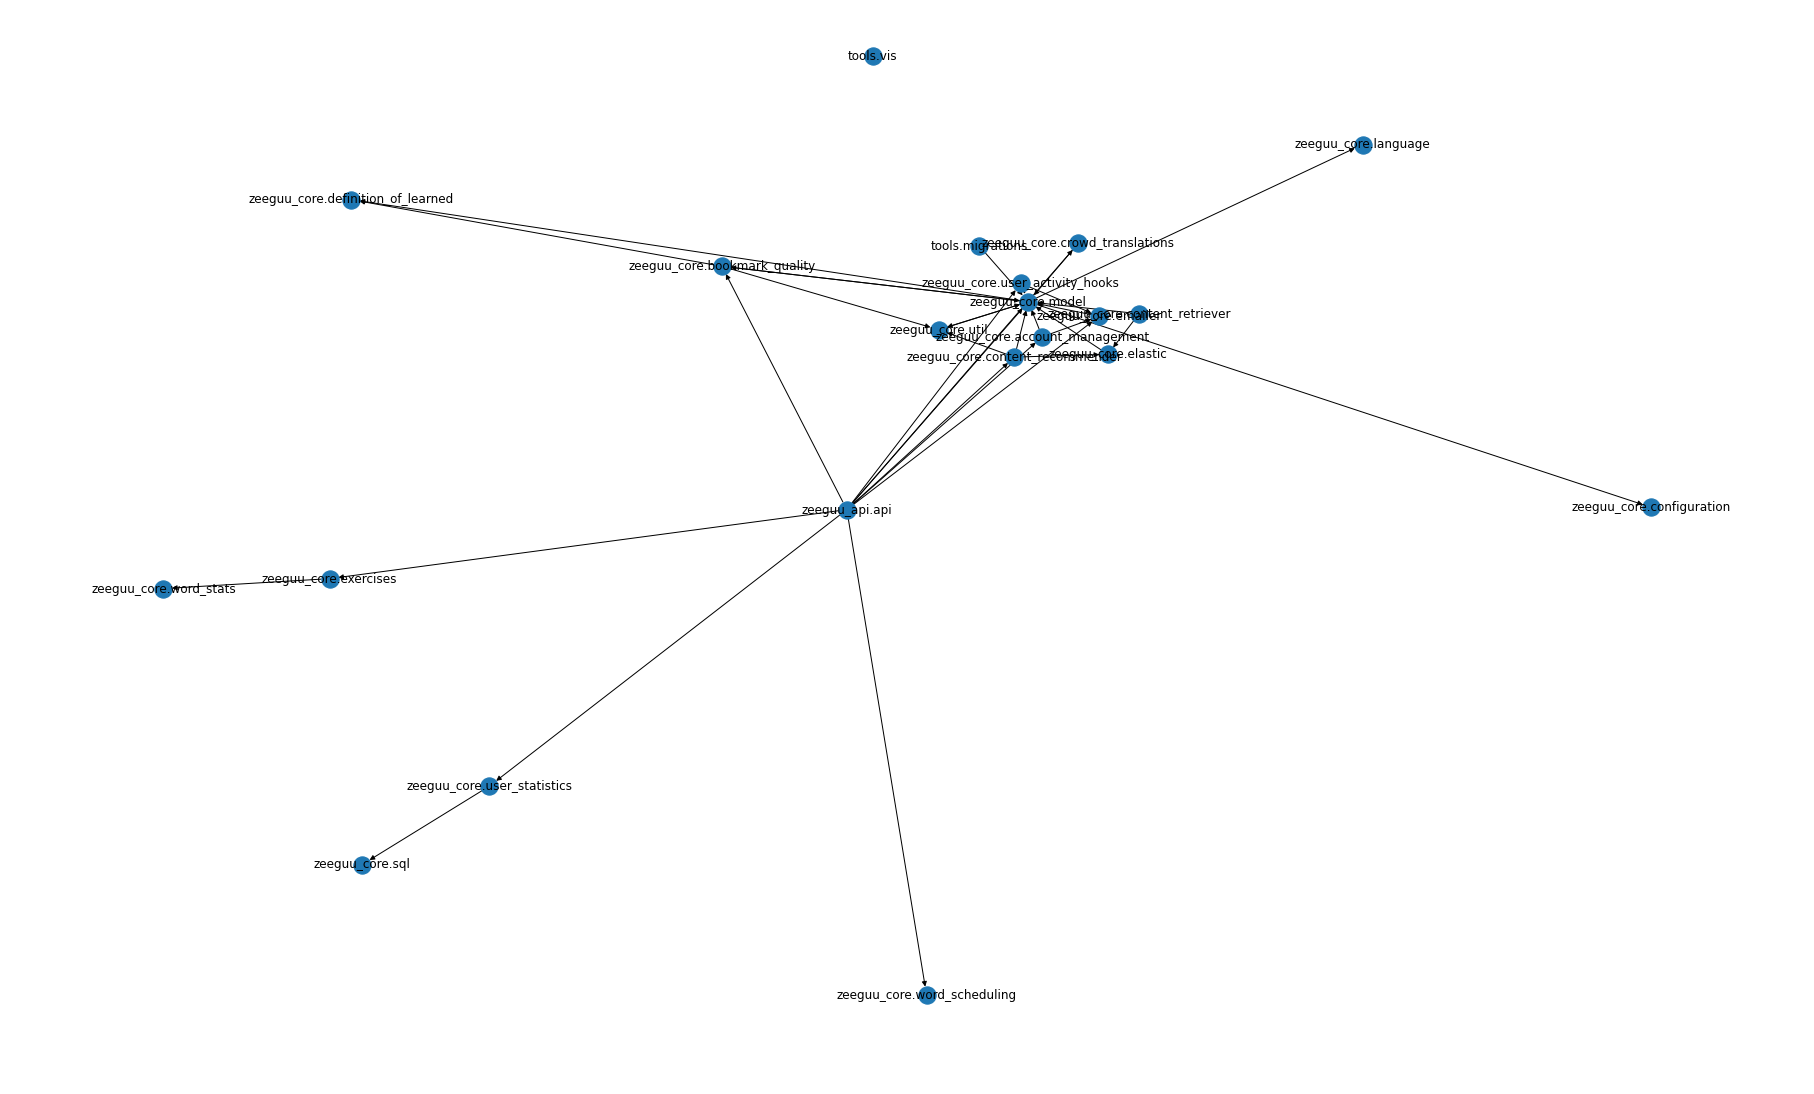

In [58]:
# remove tests

lessNoise = {}
for key in dictThird:
  if "tests" not in key: 
    lessNoise[key] = dictThird[key]

print(dictThird)
for key in lessNoise.keys():
  print(f'{key} -> {lessNoise[key]}')


G = dependencies_graph(lessNoise)
draw_graph_with_labels(G, figsize=(25,15))

# Code partially made on my own combined with code from the course material

This is code, which I experimented with during the first phases of the project. Initial research and understanding of the functions and the source code.

## Utility functions

In [123]:
# utility functions used later

# full path to the file given a relative file_name
def file_path(file_name):
    return CODE_ROOT_FOLDER+file_name

# naïve way of extracting imports
def imports(file):

    def extract_import_from_line(line):
      x = re.search("^import (\S+)", line) 
      x = re.search("^from (\S+)", line) 
      return x.group(1)

    # extracts all the imported modules from a file
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports



def module_from_file_path(folder_prefix, full_path):
    # extracting a module from a file name
    # e.g. ../zeeguu_core/model/user.py -> zeeguu_core.model.user
    
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path(CODE_ROOT_FOLDER, full_path)

# Two methods for constructing the graph structure and drawing it
def dependencies_graph():
    files = Path(CODE_ROOT_FOLDER).rglob("*.py")

    G = nx.Graph()

    for file in files:
      #print(file)
      if 'tools/vis' not in str(file):
        m = module(str(file))
        if m not in G.nodes:
            G.add_node(m)

        for each in imports(str(file)):
            G.add_edge(m, each)

    return G


def draw_graph(G):
    plt.figure(figsize=(20,20))
    nx.draw(G)
    plt.show()

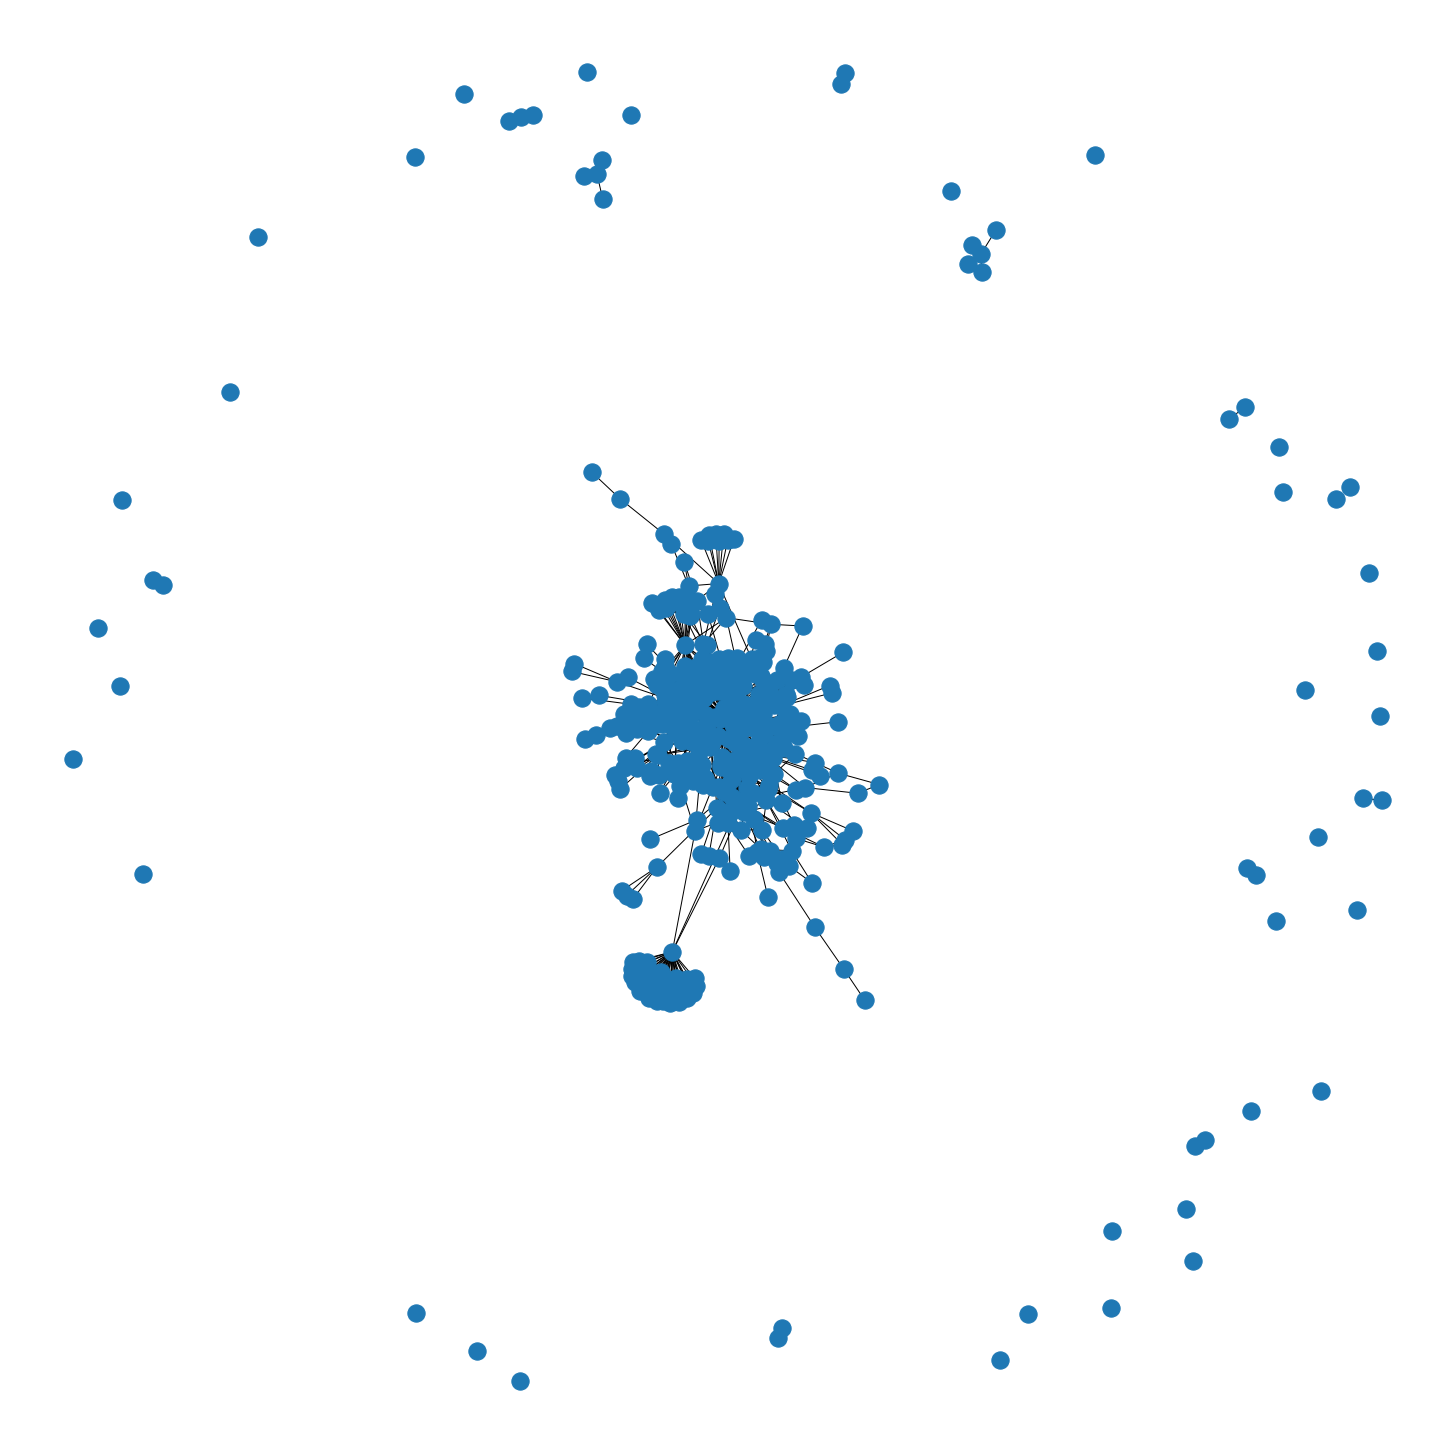

In [112]:
G = dependencies_graph()
draw_graph(G)

AST

In [ ]:
files = Path(CODE_ROOT_FOLDER).rglob("*.py")
for file in files:
  f = open(str(file))
  user_ast = ast.parse(f.read())
  print(user_ast.body)  

In [114]:
class GenericVisitor(ast.NodeVisitor):
    def generic_visit(self, node):
        print (type(node).__name__)
        ast.NodeVisitor.generic_visit(self, node)

#visitor = GenericVisitor()
#visitor.visit(user_ast)

In [115]:
class ImportVisitor(ast.NodeVisitor):
    list = []

    def visit_Import(self, import_node):
        # retrieve the name from the returned object
        # normally, there is just a single alias
        for alias in import_node.names:
            ImportVisitor.list.append(alias.name)
            #print (f'importing {alias.name}')
        
        # allow_parser to continue 
        super(ImportVisitor, self).generic_visit(import_node)

def top_level_functions(body):
    return (f for f in body if isinstance(f, ast.FunctionDef))

#ImportVisitor().visit(user_ast)
#print(ImportVisitor().list)

In [ ]:
files = Path(CODE_ROOT_FOLDER).rglob("*.py")
for file in files:
  try:
    f = open(str(file))
    user_ast = ast.parse(f.read())
    for func in top_level_functions(user_ast.body):
              print(f"{func.name} found in {str(file)}")
    f.close()
  except:
    continue

In [120]:
# using ast
def imports(file):
    #print(file)
    if 'tools.vis' not in str(file):
      f = open(str(file))
      try:
        user_ast = ast.parse(f.read())
        ImportVisitor().visit(user_ast)
        return ImportVisitor().list
      except:
        print(f'There was a parse error in file: {file}')
        return []
      finally:
        f.close()
    return []

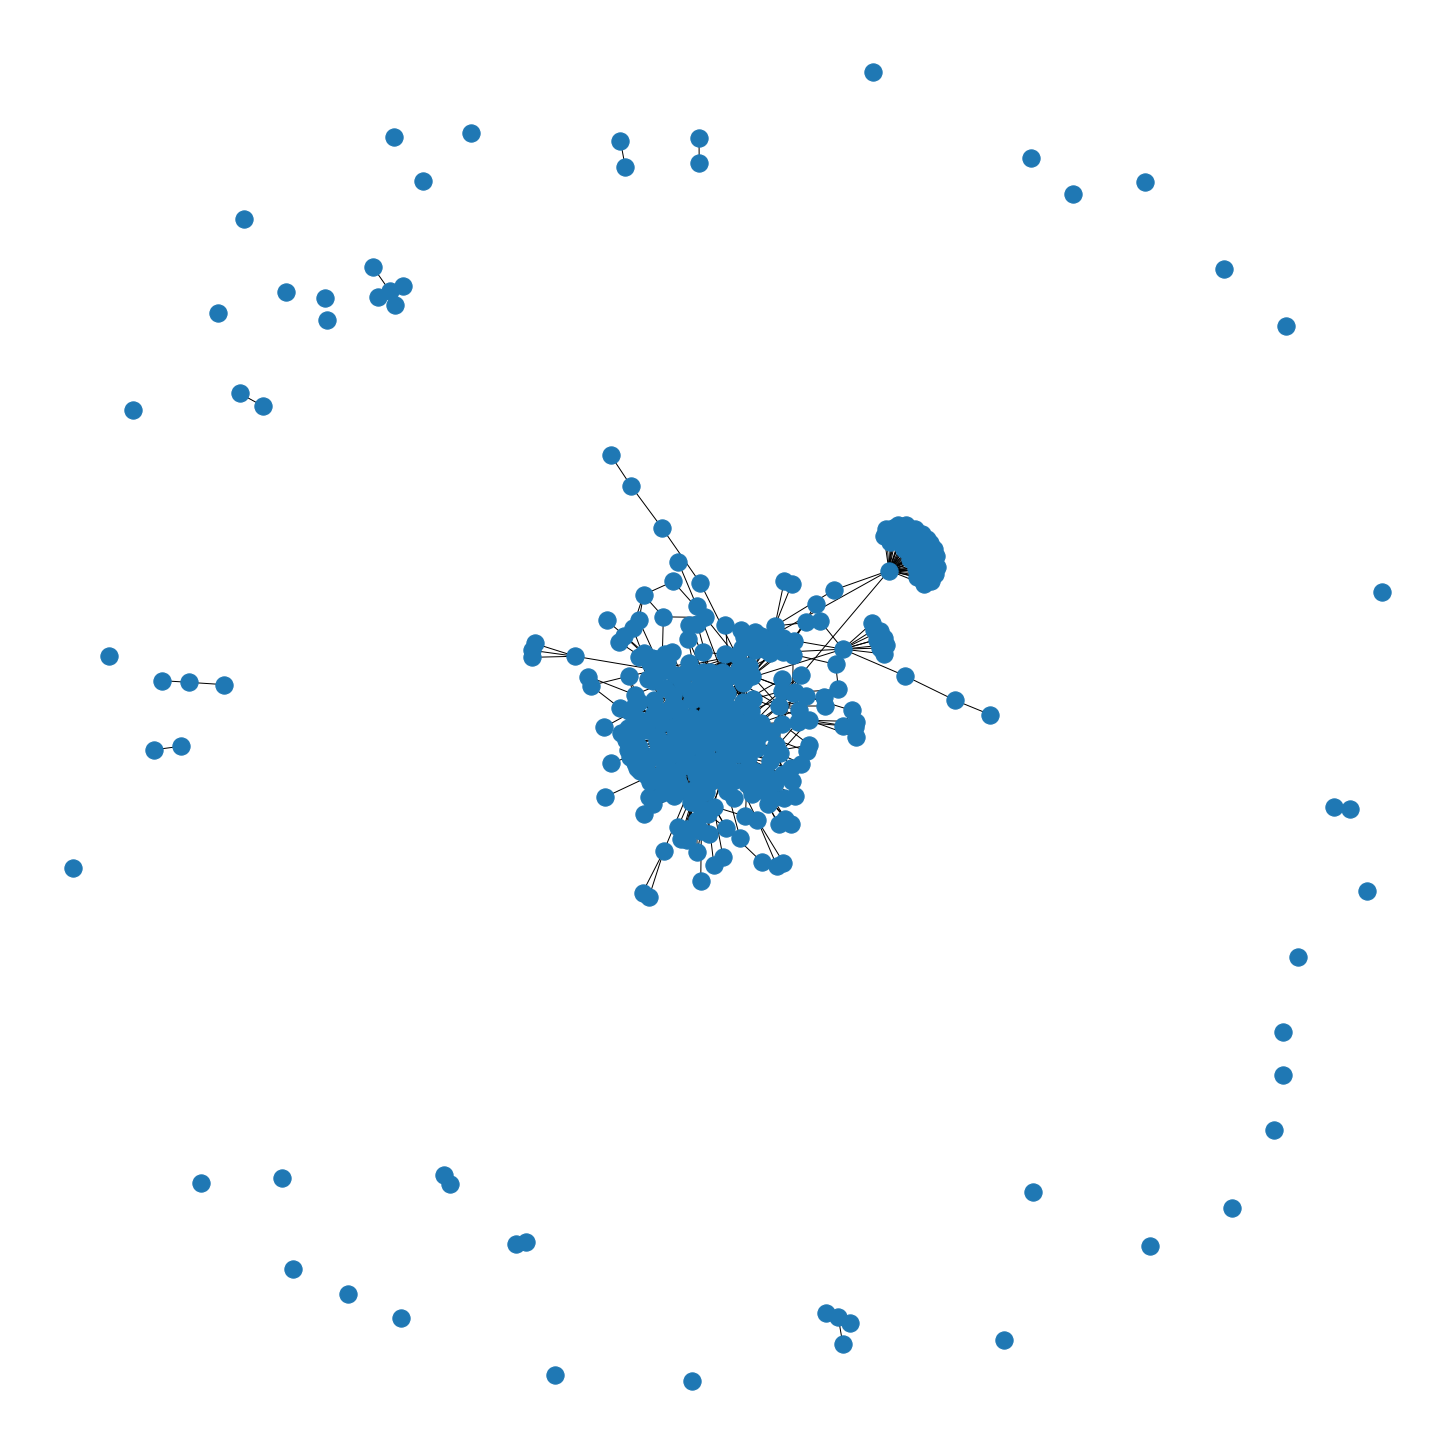

In [125]:
G = dependencies_graph()
draw_graph(G)

## Abstraction and Knowledge-Inference

Extract the dependencies as a first step of abstraction.


In [23]:
def top_level_module(module_name, depth=1):
    components = module_name.split(".")
    return ".".join(components[:depth])

def abstracted_to_top_level(G):
    aG = nx.DiGraph()
    for each in G.edges():
        source = top_level_module(each[0])
        destination = top_level_module(each[1])
        #if is_system_module(source) and is_system_module(destination):
        aG.add_edge(source, destination)
    return aG

def draw_graph_with_labels(G, figsize=(10,10)):
    plt.figure(figsize=figsize)
    nx.draw(G, with_labels=True)
    plt.show()


In [24]:
G = dependencies_graph()
aG = abstracted_to_top_level(G)
draw_graph_with_labels(aG, (20,10))

NameError: ignored

In [ ]:
def degree_of_nodes(G, degree):
  aG = nx.DiGraph()
  to_include = []
  for node in G.degree:
    if node[1] > degree:
      to_include.append(node[0])
      #print(node)
  for each in G.edges():
      source = top_level_module(each[0])
      destination = top_level_module(each[1])
      if source in to_include and destination in to_include:
        aG.add_edge(source, destination)
  return aG

G = dependencies_graph()
aG = degree_of_nodes(G, 1)
draw_graph_with_labels(aG, (20,10))

In [ ]:
# extract directories


This graph has too many third party imports compared to the ones relevant for the architecture of the system.

In [ ]:
def is_system_module(m):
    return (m.startswith('zeeguu') or m=='tools' or m=='tests') #and ('test' not in m)

def abstracted_to_top_level(G):
    aG = nx.DiGraph()
    for each in G.edges():
        source = top_level_module(each[0], 1)
        destination = top_level_module(each[1], 1)
        if is_system_module(source) and is_system_module(destination):
            aG.add_edge(source, destination)
    return aG

In [ ]:
directed = dependencies_graph()
directedAbstracted = abstracted_to_top_level(directed)
draw_graph_with_labels(directedAbstracted, (15,15))

Module properties


In [ ]:
def definitions(file):

    def extract_def_from_line(line):
      x = re.search("^def (\S+)", line) 
      return x.group(0)

    # extracts all the imported modules from a file
    lines = [line for line in open(file)]
    
    all_defs = []
    for line in lines:
        try:
            all_defs.append(extract_def_from_line(line))
        except:
            continue

    return all_defs

In [ ]:
# the simplest possible approximation of the simplest possible metric
def LOC(file):
    return sum([1 for line in open(file)])

def NOM_AST(file):
  sum = 0
  try:
      f = open(str(file))
      user_ast = ast.parse(f.read())
      for func in top_level_functions(user_ast.body):
                sum += 1
                #print(f"{func.name} found in {str(file)}")
      f.close()
      return sum
  except:
    return sum

def NOM(file):
  return len(definitions(file))

def module_size(m):
    size = 0
    files = Path(CODE_ROOT_FOLDER).rglob("*.py")
    for file in files:
        module_name = module(str(file))
        if module_name.startswith(m + '.'):
            #print(NOM(str(file)))
            size += LOC(str(file))
            
    return size

# Do number of methods by seraching for def's


In [ ]:
print(module_size("zeeguu_core.model"))
print(module_size("zeeguu_api"))

Weighted graphs

In [ ]:
def draw_graph_with_weights(G, weight_function, figsize=(10,10)):
    
    node_weights = [weight_function(each) for each in G.nodes]
    
    plt.figure(figsize=figsize)
    nx.draw(G,
            with_labels=True,
            node_size=node_weights)
    plt.show()


In [ ]:
directed = dependencies_graph()
directedAbstracted = abstracted_to_top_level(directed)
draw_graph_with_weights(directedAbstracted, module_size, (15,15))    